# Image Classification of Casting Product

## Import requirements

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import pandas as pd
import matplotlib.pyplot as plt

## Download the data from Kaggle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ravirajsinh45/real-life-industrial-dataset-of-casting-product")

print("Path to dataset files:", path)

100%|██████████| 100M/100M [00:00<00:00, 147MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product/versions/2


## Create a new directory before moving the dataset to the desired path

In [ ]:
#Create a new directory
import os

dataset_path = "content/dataset"  # Update if you moved it to a different path
os.makedirs(dataset_path, exist_ok=True)
print("Dataset Structure:", os.listdir(dataset_path))


Dataset Structure: []


## Move the dataset to the directory

In [ ]:
import shutil
shutil.move(path,dataset_path)
print("Desired directory", os.listdir(dataset_path))

Desired directory ['2']


In [ ]:
for subdir in os.listdir(dataset_path):
    subdir_path = os.path.join(dataset_path, subdir)
    if os.path.isdir(subdir_path):
        print(f"Category '{subdir}': {len(os.listdir(subdir_path))} images")


Category '2': 2 images


In [ ]:
import os

dataset_path = "content/dataset"  # Change to your actual dataset path

# Loop through each subdirectory
for subdir in sorted(os.listdir(dataset_path)):  # Sorted for better readability
    subdir_path = os.path.join(dataset_path, subdir)
    if os.path.isdir(subdir_path):  # Ensure it's a folder
        num_images = len(os.listdir(subdir_path))
        print(f"Category '{subdir}': {num_images} images")


Category '2': 2 images


In [ ]:
wrong_folder = os.path.join(dataset_path, "2")
if os.path.exists(wrong_folder):
    print("Contents of '2':", os.listdir(wrong_folder))


Contents of '2': ['casting_512x512', 'casting_data']


In [ ]:
import os

dataset_path = "content/dataset"  # Change to your actual dataset path

casting_data_path = os.path.join(dataset_path, "2", "casting_data")
casting_512x512_path = os.path.join(dataset_path, "2", "casting_512x512")

if os.path.exists(casting_data_path):
    print("Contents of 'casting_data':", os.listdir(casting_data_path))

if os.path.exists(casting_512x512_path):
    print("Contents of 'casting_512x512':", os.listdir(casting_512x512_path))


Contents of 'casting_data': ['casting_data']
Contents of 'casting_512x512': ['casting_512x512']


In [ ]:
import os
import shutil

dataset_path = "content/dataset"  # Your dataset path
subfolder = "2"  # The category folder

casting_data_path = os.path.join(dataset_path, subfolder, "casting_data", "casting_data")
casting_512x512_path = os.path.join(dataset_path, subfolder, "casting_512x512", "casting_512x512")

# Function to move files out of nested folders
def move_files_up(source, destination):
    if os.path.exists(source) and os.path.isdir(source):
        for file in os.listdir(source):
            shutil.move(os.path.join(source, file), destination)
        shutil.rmtree(source)  # Remove the now-empty folder

# Move files and clean up
move_files_up(casting_data_path, os.path.join(dataset_path, subfolder, "casting_data"))
move_files_up(casting_512x512_path, os.path.join(dataset_path, subfolder, "casting_512x512"))

# Verify final structure
print("Final contents of 'casting_data':", os.listdir(os.path.join(dataset_path, subfolder, "casting_data")))
print("Final contents of 'casting_512x512':", os.listdir(os.path.join(dataset_path, subfolder, "casting_512x512")))



Final contents of 'casting_data': ['train', 'test']
Final contents of 'casting_512x512': ['def_front', 'ok_front']


In [ ]:
import os
import shutil

dataset_path = "content/dataset"
subfolder = os.path.join(dataset_path, "2")  # The "2" folder

# Move all contents from '2' to 'dataset'
if os.path.exists(subfolder):
    for item in os.listdir(subfolder):
        item_path = os.path.join(subfolder, item)
        shutil.move(item_path, dataset_path)  # Move everything to dataset folder

    # Remove the empty '2' folder
    os.rmdir(subfolder)

# Verify final structure
print("Final dataset structure:", os.listdir(dataset_path))


Final dataset structure: ['casting_512x512', 'casting_data']


In [ ]:
for subdir in os.listdir(dataset_path):
    subdir_path = os.path.join(dataset_path, subdir)
    if os.path.isdir(subdir_path):
        print(f"Category '{subdir}': {len(os.listdir(subdir_path))} images")


Category 'casting_512x512': 2 images
Category 'casting_data': 2 images


## Visualizing the data before loading the data

In [ ]:
import os

dataset_path = "content/dataset/casting_512x512"  # Change this to your actual path
category = "ok_front"  # Choose a category (e.g., 'defective', 'ok')

category_path = os.path.join(dataset_path, category)

# List some images
image_files = [f for f in os.listdir(category_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
print(f"Found {len(image_files)} images in '{category}' category.")
print("Sample images:", image_files[:5])  # Print first 5 image filenames


Found 519 images in 'ok_front' category.
Sample images: ['cast_ok_0_211.jpeg', 'cast_ok_0_2622.jpeg', 'cast_ok_0_2208.jpeg', 'cast_ok_0_5310.jpeg', 'cast_ok_0_6890.jpeg']


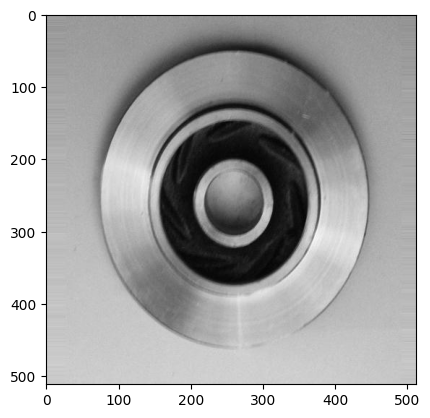

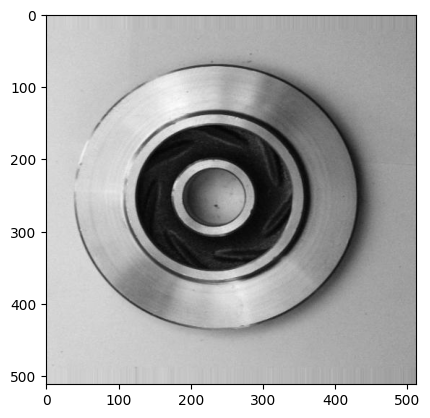

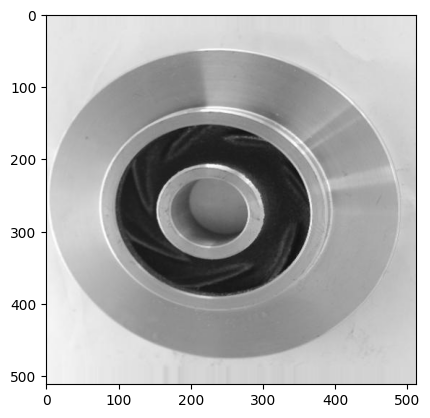

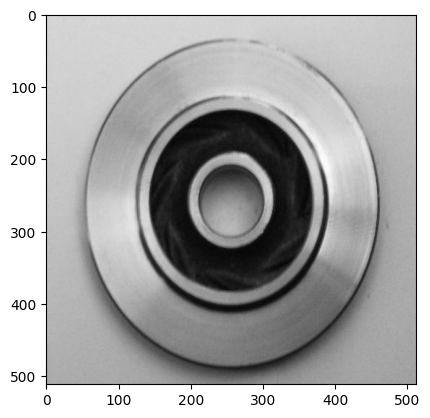

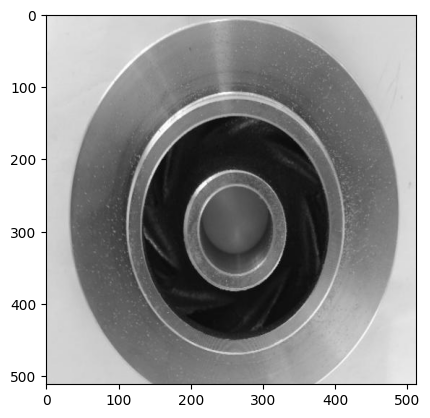

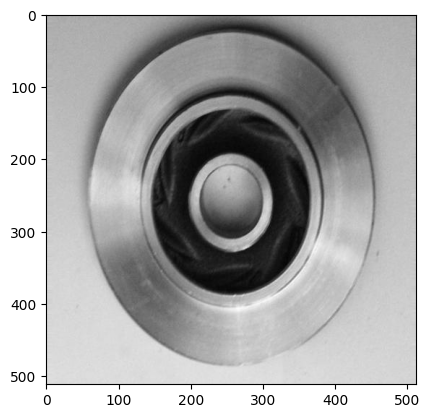

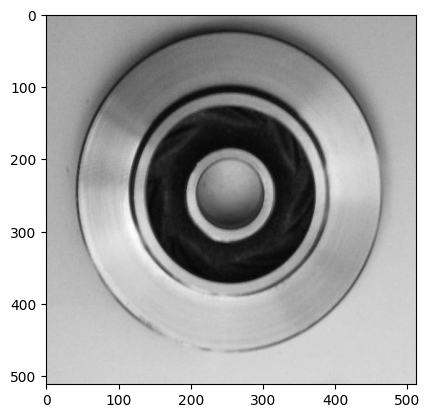

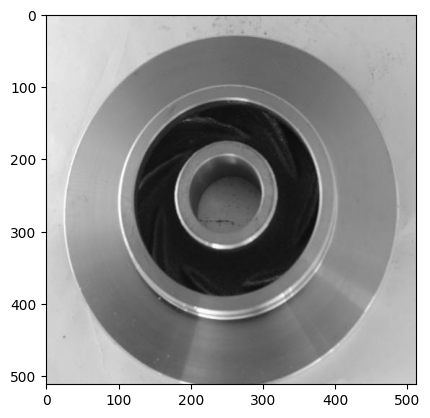

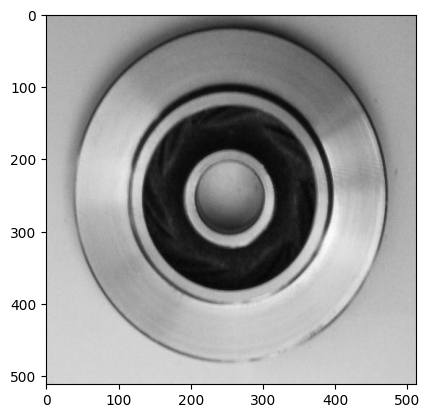

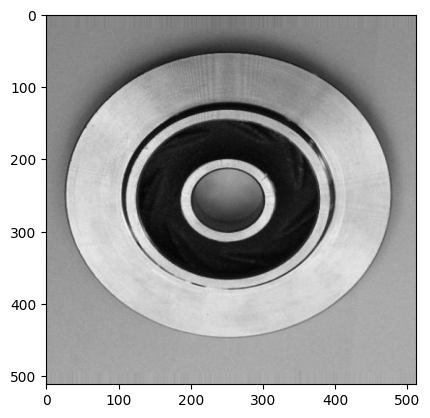

In [ ]:
from PIL import Image
for i in range(10):
  sample_image_path = os.path.join(category_path, image_files[i])
  image = Image.open(sample_image_path)
  plt.imshow(image)
  plt.show()

## Visualizing the defect front images

In [ ]:
import os
dataset_path = "content/dataset/casting_512x512"
category = "def_front"

category_path = os.path.join(dataset_path,category)
#List some images
def_image_files = [f for f in os.listdir(category_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
print(f"Found {len(def_image_files)} images in {category} category")
print(f"Sample images : {def_image_files[:5]}")


Found 781 images in def_front category
Sample images : ['cast_def_0_1532.jpeg', 'cast_def_0_8848.jpeg', 'cast_def_0_3394.jpeg', 'cast_def_0_3855.jpeg', 'cast_def_0_4708.jpeg']


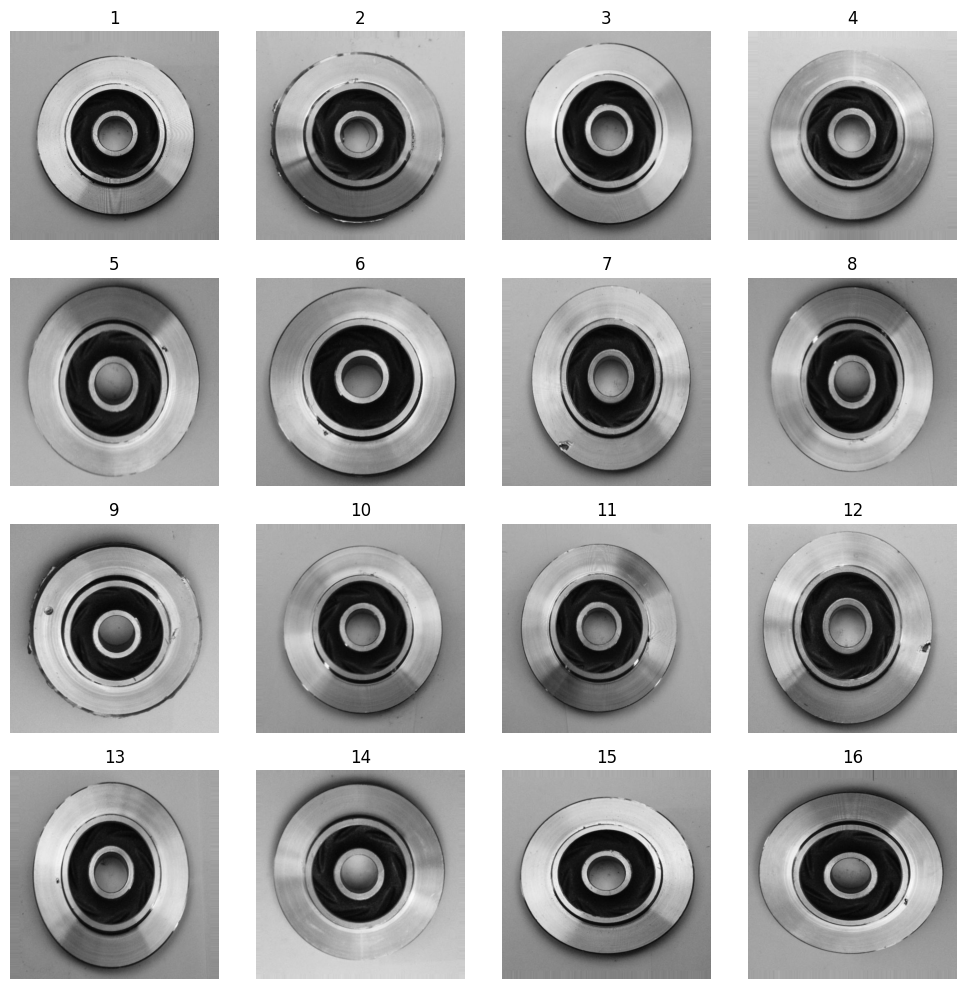

In [ ]:
from PIL import Image
num_images = min(16, len(def_image_files))
rows, cols = 4, 4
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
  if i < num_images:
    sample_def_image_path = os.path.join(category_path, def_image_files[i])
    image = Image.open(sample_def_image_path)
    ax.imshow(image)
    ax.set_title(f"{i+1}")
  ax.axis("off")

plt.tight_layout()
plt.show()


## Prepare the dataset and dataloader

In [ ]:
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split

# Define dataset transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224 (adjust if needed)
    transforms.ToTensor(),          # Convert to tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize
])

# Load the dataset
full_dataset = datasets.ImageFolder(root = "content/dataset/casting_512x512", transform = transform)

train_size = int(0.8*len(full_dataset))
test_size = len(full_dataset) - train_size

train_dataset, test_dataset = random_split(full_dataset,[train_size, test_size])

# Prepare the dataloader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
test_dataloader = DataLoader(test_dataset, shuffle = False, batch_size=32, num_workers= 2)

print(f"Train Dataset: {len(train_dataset)},Train Samples: {len(train_dataloader)}, Test Dataset: {len(test_dataset)}, Test samples: {len(test_dataloader)}")

Train Dataset: 1040,Train Samples: 33, Test Dataset: 260, Test samples: 9


## Visualising the transformed images from the iterable dataloaders


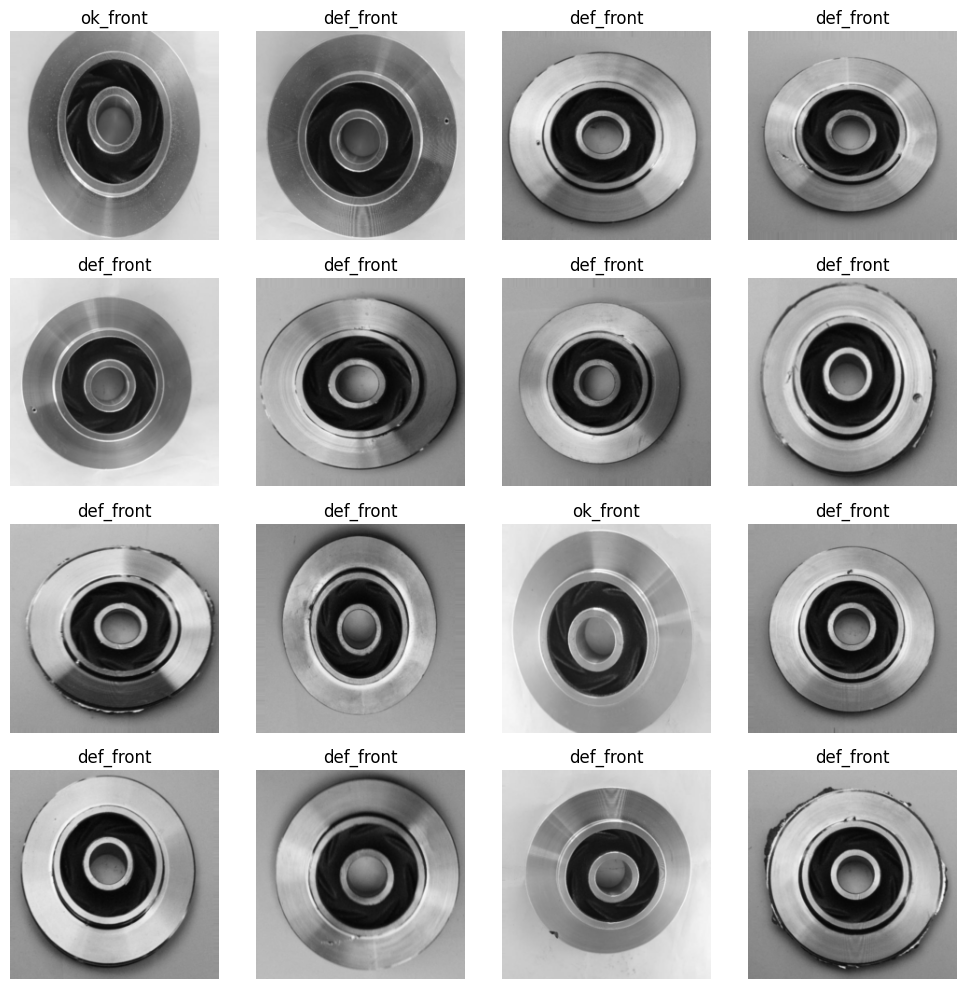

In [ ]:
import numpy as np

image_batch, label_batch = next(iter(train_dataloader))

# visualize random images from the batch created
rows, cols = 4,4
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
  image = image_batch[i]
  img = image*0.5 + 0.5
  img = np.clip(img.numpy().transpose((1, 2, 0)), 0, 1)
  ax.imshow(img, cmap="gray")
  ax.set_title(f"{full_dataset.classes[label_batch[i]]}")
  ax.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Build CNN model

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
    self.relu1 = nn.ReLU()
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

    self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
    self.relu2 = nn.ReLU()
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

    self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
    self.relu3 = nn.ReLU()
    self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(128 * 28 * 28, 256)
    self.relu4 = nn.ReLU()
    self.fc2 = nn.Linear(256, 1)  # Binary classification (2 classes)

  def forward(self, x):
      x = self.pool1(self.relu1(self.conv1(x)))
      x = self.pool2(self.relu2(self.conv2(x)))
      x = self.pool3(self.relu3(self.conv3(x)))
      x = self.flatten(x)
      x = self.relu4(self.fc1(x))
      x = self.fc2(x)
      return x

In [ ]:
cnn_model = CNN()

In [ ]:
cnn_model.to(device)

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=100352, out_features=256, bias=True)
  (relu4): ReLU()
  (fc2): Linear(in_features=256, out_features=1, bias=True)
)

## Testing the model with sample batch before building the training loop

In [ ]:
sample_images, sample_labels= next(iter(train_dataloader))
print(f"Sample batch shape: {sample_images.shape}")  # Expected: (batch_size, channels, height, width)
print(f"Sample labels: {sample_labels}")

Sample batch shape: torch.Size([32, 3, 224, 224])
Sample labels: tensor([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 1])


In [ ]:
sample_images = sample_images.to(device)
sample_output= cnn_model(sample_images)

print(f"Output shape: {sample_output.shape}")
print(f"Sample model output:\n {sample_output[:5]}")

Output shape: torch.Size([32, 1])
Sample model output:
 tensor([[-0.0369],
        [-0.0409],
        [-0.0366],
        [-0.0324],
        [-0.0309]], device='cuda:0', grad_fn=<SliceBackward0>)


In [ ]:
_,predicted_labels = torch.max(sample_output,1)
print(f"Predicted labels: {predicted_labels}")

Predicted labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')


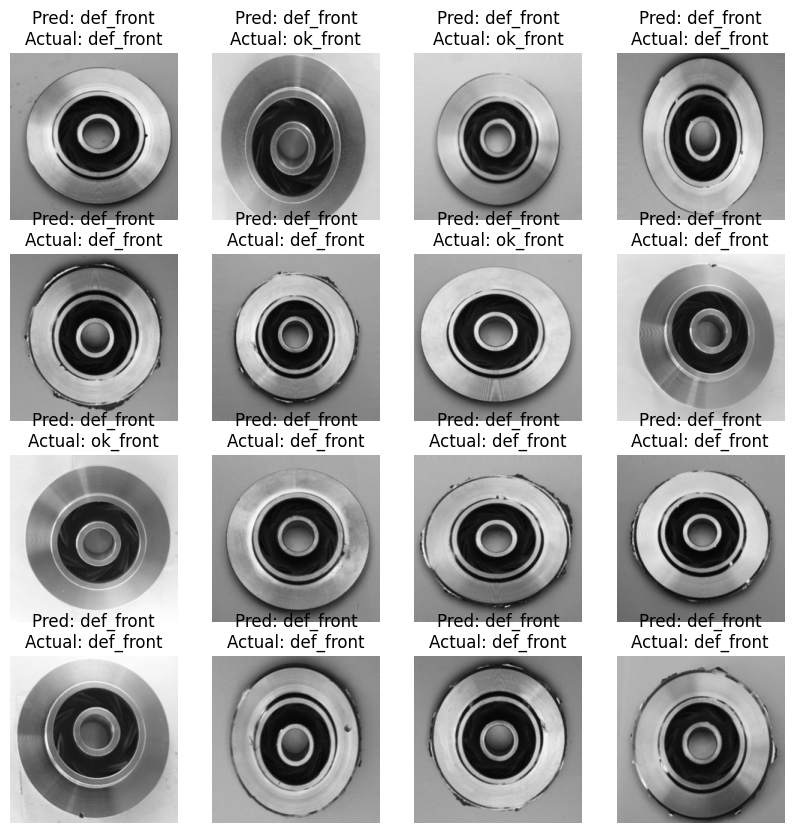

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    img = sample_images[i].cpu().numpy().transpose((1, 2, 0)) * 0.5 + 0.5  # Convert back to original range
    ax.imshow(img)
    ax.set_title(f"Pred: {full_dataset.classes[predicted_labels[i]]}\nActual: {full_dataset.classes[sample_labels[i]]}")
    ax.axis("off")
plt.show()


## Create loss function and Optimizer

In [ ]:
## create the loss function and optimizer
loss_fn =  nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params = cnn_model.parameters(), lr = 0.001)


## Training the model

In [ ]:
torch.manual_seed(42)
num_epochs = 15
for epoch in range(num_epochs):
    cnn_model.train()
    running_loss = 0.0

    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device).float()

        optimizer.zero_grad()
        outputs = cnn_model(images).squeeze(1)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_dataloader):.4f}")

print("Training complete!")

Epoch [1/15], Loss: 0.6099
Epoch [2/15], Loss: 0.4921
Epoch [3/15], Loss: 0.4396
Epoch [4/15], Loss: 0.3074
Epoch [5/15], Loss: 0.2005
Epoch [6/15], Loss: 0.1553
Epoch [7/15], Loss: 0.0834
Epoch [8/15], Loss: 0.0510
Epoch [9/15], Loss: 0.0558
Epoch [10/15], Loss: 0.0613
Epoch [11/15], Loss: 0.0225
Epoch [12/15], Loss: 0.0083
Epoch [13/15], Loss: 0.0066
Epoch [14/15], Loss: 0.0049
Epoch [15/15], Loss: 0.0016
Training complete!


## Evaluating the model

In [ ]:
# Evaluate model
cnn_model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = cnn_model(images).squeeze(1)  # Remove extra dimension [32,1] -> [32]

        # Convert outputs to predicted class (0 or 1)
        predicted = (torch.sigmoid(outputs) > 0.5).float()  # Threshold at 0.5

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Validation Accuracy: {accuracy:.2f}%')

Validation Accuracy: 98.85%


In [ ]:
# Check test set class distribution
from collections import Counter
test_labels = []
with torch.no_grad():
    for _, labels in test_dataloader:
        test_labels.extend(labels.cpu().numpy())
print(Counter(test_labels))  # Should be roughly balanced (e.g., {0: 500, 1: 500})

Counter({np.int64(0): 155, np.int64(1): 105})


## Plotting the heatmap of the confusion matrix

<Axes: >

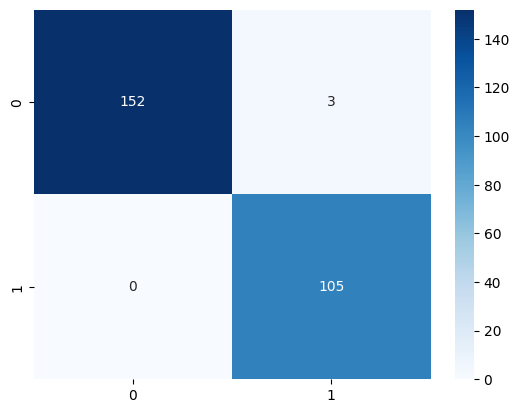

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = cnn_model(images).squeeze(1)
        preds = (torch.sigmoid(outputs) > 0.5).float()
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

## Visualization of Classified Vs Misclassified images

In [ ]:
cnn_model.eval()
misclassified = []
correctly_classified = []

with torch.no_grad():
    for i, (images, labels) in enumerate(test_dataloader):
        images, labels = images.to(device), labels.to(device)
        outputs = cnn_model(images).squeeze(1)
        preds = (torch.sigmoid(outputs) > 0.5).float()

        # Store batch indices and data
        for j in range(len(labels)):
            idx = i * test_dataloader.batch_size + j  # Global index
            if preds[j] != labels[j]:
                misclassified.append((idx, images[j], labels[j], preds[j]))
            else:
                correctly_classified.append((idx, images[j], labels[j], preds[j]))

In [ ]:
import matplotlib.pyplot as plt

def plot_samples(samples, title):
    plt.figure(figsize=(15, 5))
    plt.suptitle(title, y=1.05)
    for i, (idx, img, true, pred) in enumerate(samples[:8]):  # Show first 8
        plt.subplot(2, 4, i+1)
        img = img.cpu().permute(1, 2, 0).numpy()
        if img.shape[2] == 1:  # Grayscale
            img = img.squeeze()
        plt.imshow(img)
        plt.title(f"True: {true.item()}\nPred: {pred.item()}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

Showing 3 misclassified samples:


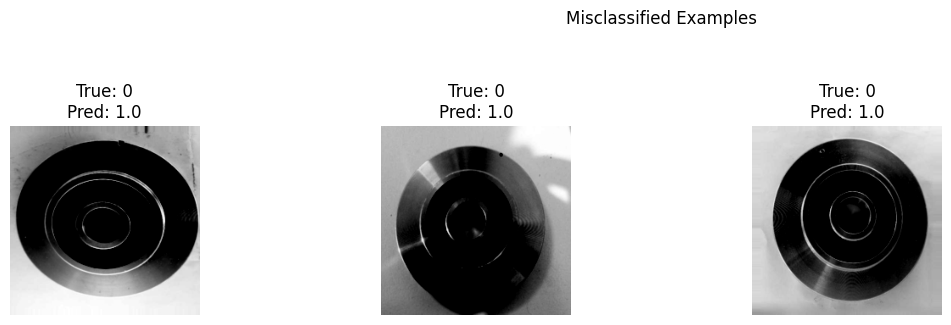

Showing 257 correct samples:


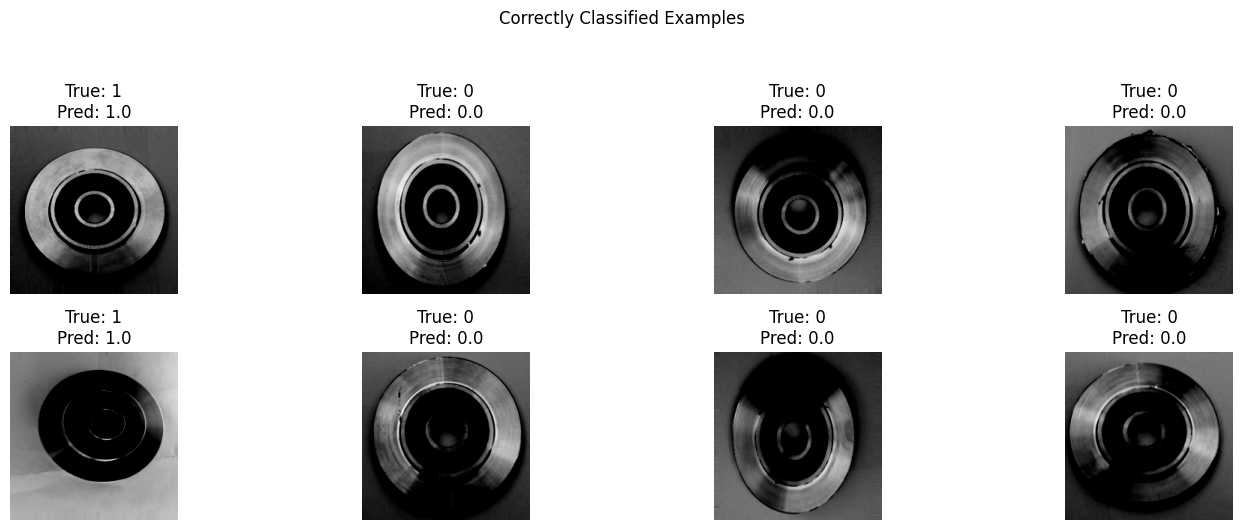

In [ ]:
# Misclassified examples (errors)
print(f"Showing {len(misclassified)} misclassified samples:")
plot_samples(misclassified, "Misclassified Examples")

# Correctly classified examples
print(f"Showing {len(correctly_classified)} correct samples:")
plot_samples(correctly_classified[:8], "Correctly Classified Examples")  # First 8 correct